In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import re
import os
import seaborn as sns

In [73]:
csv_files = glob('../csv/EXA_FIRST_マイジャグラーV_*.csv')
# csv_files = glob('../csv/EXA_FIRST_ゴーゴー*_*.csv')
len(csv_files), csv_files[0]

(329, '../csv\\EXA_FIRST_マイジャグラーV_2024-05-01.csv')

In [74]:
def extract_information(csv_file):
    pattern = r"(.+)_(.+)_(\d{4}-\d{2}-\d{2})\.csv"

    file_name = os.path.basename(csv_file)
    # print(file_name)
    match = re.match(pattern, file_name)

    if match:
        hall_name, machine_name, date_str = match.groups()
        return hall_name, machine_name, date_str
    else:
        print("ファイル名の形式が一致しません。")


In [75]:

dataframes = []
for csv_file in csv_files:
    hall_name, machine_name, date_str = extract_information(csv_file)
    df = pd.read_csv(csv_file, encoding="utf-8-sig")
    df["date"] = date_str
    df["hall_name"] = hall_name
    df["machine_name"] = machine_name
    dataframes.append(df)

# すべてのデータを結合したい場合
if dataframes:
    df = pd.concat(dataframes, ignore_index=True)
df.to_csv('../analysis_data.csv', index=False)
df.shape


(26649, 11)

In [76]:

# df["G数"] = (
#     df["G数"]
#     .astype(str)  # 文字列型に変換
#     .str.replace(",", "", regex=True)  # カンマを削除
#     .str.extract(r"(\d+)")  # 数字部分のみ抽出
#     .dropna()  # NaNを削除
#     .astype(int)  # 整数型に変換
# )
# df["差枚"] = (
#     df["差枚"]
#     .astype(str)  # 文字列型に変換
#     .str.replace(",", "", regex=True)  # カンマを削除
#     .str.extract(r"(\d+)")  # 数字部分のみ抽出
#     .dropna()  # NaNを削除
#     .astype(int)  # 整数型に変換
# )
# df["合成確率"] = (
#     df["合成確率"]
#     .astype(str)  # 文字列型に変換
#     .str.replace("1/", "", regex=True)  # カンマを削除
#     .str.extract(r"(\d+)")  # 数字部分のみ抽出
#     .dropna()  # NaNを削除
#     .astype(int)  # 整数型に変換
# )
# df["BB確率"] = (
#     df["BB確率"]
#     .astype(str)  # 文字列型に変換
#     .str.replace("1/", "", regex=True)  # カンマを削除
#     .str.extract(r"(\d+)")  # 数字部分のみ抽出
#     .dropna()  # NaNを削除
#     .astype(int)  # 整数型に変換
# )
# df["RB確率"] = (
#     df["RB確率"]
#     .astype(str)  # 文字列型に変換
#     .str.replace("1/", "", regex=True)  # カンマを削除
#     .str.extract(r"(\d+)")  # 数字部分のみ抽出
#     .dropna()  # NaNを削除
#     .astype(int)  # 整数型に変換
# )

# df["date"] = pd.to_datetime(df["date"], errors="coerce")
# df["month"] = df["date"].dt.to_period("M")
# df['weekday'] = df['date'].dt.weekday.astype(int)
# df['day'] = df['date'].dt.day.astype(int)
# df['last_digit_1'] = df['台番号'].astype(str).str[-1].astype(int)
# df['last_digit_2'] = df['台番号'].astype(str).str[-2:].astype(int)

def clean_slot_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # 数値変換用の共通処理
    def extract_digits(series, prefix_remove=None):
        series = series.astype(str).str.replace(",", "", regex=True)
        if prefix_remove:
            series = series.str.replace(prefix_remove, "", regex=True)
        series = series.str.extract(r"(\d+)").dropna().astype(int)
        return series

    # 各列の変換処理
    df["G数"] = extract_digits(df["G数"])
    df["差枚"] = extract_digits(df["差枚"])
    df["合成確率"] = extract_digits(df["合成確率"], prefix_remove="1/")
    df["BB確率"] = extract_digits(df["BB確率"], prefix_remove="1/")
    df["RB確率"] = extract_digits(df["RB確率"], prefix_remove="1/")

    # 日付関連
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["month"] = df["date"].dt.to_period("M")
    df["weekday"] = df["date"].dt.weekday.astype(int)
    df["day"] = df["date"].dt.day.astype(int)

    # 台番号末尾
    df["last_digit_1"] = df["台番号"].astype(str).str[-1].astype(int)
    df["last_digit_2"] = df["台番号"].astype(str).str[-2:].astype(int)

    return df

df = clean_slot_data(df)


In [77]:
df.head()

,台番号,G数,差枚,BB,RB,合成確率,BB確率,RB確率,date,hall_name,machine_name,month,weekday,day,last_digit_1,last_digit_2
0,1001,8472,2268,37,35,117,229,242,2024-05-01,EXA_FIRST,マイジャグラーV,2024-05,2,1,1,1
1,1002,5860,768,22,10,183,266,586,2024-05-01,EXA_FIRST,マイジャグラーV,2024-05,2,1,2,2
2,1003,8275,2718,34,40,111,243,206,2024-05-01,EXA_FIRST,マイジャグラーV,2024-05,2,1,3,3
3,1004,6090,759,22,17,156,276,358,2024-05-01,EXA_FIRST,マイジャグラーV,2024-05,2,1,4,4
4,1005,6024,303,23,19,143,261,317,2024-05-01,EXA_FIRST,マイジャグラーV,2024-05,2,1,5,5


## RBデータ

In [78]:
pd.options.display.float_format = '{:.0f}'.format
target_df = df[(df["date"] >= pd.to_datetime("2024-05-01"))]

In [79]:
rb_date = target_df.pivot_table(index="台番号", columns="date", values="RB確率")
rb_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1001 to 1099
Columns: 328 entries, 2024-05-01 to 2025-04-03
dtypes: float64(328)
memory usage: 208.2 KB


In [80]:
# データを表示（長い場合は全表示）
pd.set_option('display.max_rows', None)  # 全行表示
pd.set_option('display.max_columns', None)  # 全列表示


## 過去の台番号別RB確率

In [81]:

rb_rate = target_df.groupby("台番号")[["G数", "BB", "RB"]].sum()
rb_rate.loc["Total"] = rb_rate.sum()
rb_rate['BB_rate'] = rb_rate["G数"] / rb_rate["BB"]
rb_rate['RB_rate'] = rb_rate["G数"] / rb_rate["RB"]

rb_rate = rb_rate[(rb_rate["G数"] >= 0) & (rb_rate["RB_rate"] <= 100000)]
rb_rate = rb_rate.T
rb_rate.tail()

台番号,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,Total
G数,1666810,1435861,1454433,1459547,1474552,1448066,1431123,1446661,1520442,1687193,1715185,1498465,1450569,1436743,1450073,1444383,1503338,1488108,1489733,1736001,1631974,1516958,1433707,1495895,1511839,1662211,1724405,1474917,1477445,1485614,1496016,1733423,1745890,1574069,1590778,1601678,1607945,1610802,1609628,1604642,1816397,1750348,1558404,1576659,1552604,1574273,1610390,1534440,1523198,1722094,1749665,1537304,1561744,1779380,1727904,1548259,1566933,1759370,1801043,1613427,1557884,1747267,1681938,1546403,1559568,1701566,1827360,1583692,1574548,1577907,1553269,1585671,1574175,1747793,1776386,1585398,1515930,1524903,1527248,1532530,1758818,128731212
BB,6131,5474,5594,5609,5605,5610,5496,5594,5903,6234,6448,5746,5548,5525,5494,5568,5812,5629,5752,6550,6103,5759,5557,5741,5736,6256,6565,5569,5704,5726,5750,6664,6614,5989,6126,6194,6138,6167,6207,6135,6836,6584,5900,5819,5854,5803,6080,5811,5728,6571,6615,5746,5891,6549,6619,5836,5953,6741,6932,6211,5989,6644,6446,5974,5790,6325,6756,6040,5984,5957,5928,5939,5992,6643,6601,6095,5827,5727,5695,5766,6538,488757
RB,4706,4166,4379,4309,4276,4224,4274,4267,4373,4844,4805,4333,4231,4232,4400,4347,4524,4577,4320,4902,4601,4457,4190,4470,4622,4688,4879,4449,4526,4616,4569,4946,5066,4817,4956,4992,4955,4897,5094,5097,5213,4899,4706,4956,4711,4680,4950,4508,4527,4747,4928,4618,4691,5335,5054,4686,4708,5151,5452,4911,4804,5263,4861,4457,4688,4708,5401,4904,4860,4886,4781,4984,4671,5016,5149,4697,4602,4543,4682,4534,4897,382195
BB_rate,272,262,260,260,263,258,260,259,258,271,266,261,261,260,264,259,259,264,259,265,267,263,258,261,264,266,263,265,259,259,260,260,264,263,260,259,262,261,259,262,266,266,264,271,265,271,265,264,266,262,264,268,265,272,261,265,263,261,260,260,260,263,261,259,269,269,270,262,263,265,262,267,263,263,269,260,260,266,268,266,269,263
RB_rate,354,345,332,339,345,343,335,339,348,348,357,346,343,339,330,332,332,325,345,354,355,340,342,335,327,355,353,332,326,322,327,350,345,327,321,321,325,329,316,315,348,357,331,318,330,336,325,340,336,363,355,333,333,334,342,330,333,342,330,329,324,332,346,347,333,361,338,323,324,323,325,318,337,348,345,338,329,336,326,338,359,337


## 月別のデータ

In [82]:
game_month = target_df.pivot_table(columns="台番号", index="month", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_month = target_df.pivot_table(columns="台番号", index="month", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_month = game_month / rb_month
pd.concat([rb_rate.drop(["BB", "RB", "BB_rate"]), rb_rate_month.drop("Total")])


台番号,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,Total
G数,1666810,1435861,1454433,1459547,1474552,1448066,1431123,1446661,1520442,1687193,1715185,1498465,1450569,1436743,1450073,1444383,1503338,1488108,1489733,1736001,1631974,1516958,1433707,1495895,1511839,1662211,1724405,1474917,1477445,1485614,1496016,1733423,1745890,1574069,1590778,1601678,1607945,1610802,1609628,1604642,1816397,1750348,1558404,1576659,1552604,1574273,1610390,1534440,1523198,1722094,1749665,1537304,1561744,1779380,1727904,1548259,1566933,1759370,1801043,1613427,1557884,1747267,1681938,1546403,1559568,1701566,1827360,1583692,1574548,1577907,1553269,1585671,1574175,1747793,1776386,1585398,1515930,1524903,1527248,1532530,1758818,128731212
RB_rate,354,345,332,339,345,343,335,339,348,348,357,346,343,339,330,332,332,325,345,354,355,340,342,335,327,355,353,332,326,322,327,350,345,327,321,321,325,329,316,315,348,357,331,318,330,336,325,340,336,363,355,333,333,334,342,330,333,342,330,329,324,332,346,347,333,361,338,323,324,323,325,318,337,348,345,338,329,336,326,338,359,337
2024-05,351,346,316,332,322,312,326,304,322,340,410,320,345,311,288,296,325,328,334,371,372,323,317,334,310,346,314,328,305,291,271,335,336,323,317,297,308,271,294,302,345,352,306,304,313,330,280,308,325,334,330,307,320,311,355,304,329,337,312,334,281,333,331,340,313,376,354,288,284,310,338,318,324,312,333,306,324,322,274,326,364,320
2024-06,352,349,294,297,332,343,346,373,344,319,364,338,349,339,318,336,317,278,323,334,337,335,325,316,335,346,330,323,285,291,299,350,348,320,307,310,301,320,282,292,359,353,293,310,335,366,342,356,323,325,319,304,312,317,326,315,319,313,303,324,300,318,347,303,290,367,316,301,292,302,306,318,345,332,348,321,341,330,322,336,345,323
2024-07,329,327,352,369,335,325,338,329,345,361,350,354,307,320,320,321,323,329,329,352,343,373,329,353,313,323,344,314,338,307,331,333,347,299,301,297,303,326,322,319,360,335,349,287,317,329,351,332,341,379,358,326,340,344,341,307,315,328,329,296,331,313,342,366,336,368,361,339,344,346,338,334,328,395,345,328,290,350,332,353,345,333
2024-08,343,334,362,343,345,345,342,342,343,351,362,341,345,340,330,313,328,325,349,340,362,337,366,304,337,366,340,323,326,301,315,334,334,322,301,301,325,328,332,318,327,369,341,291,322,331,315,353,333,383,346,341,317,333,342,357,318,355,345,346,335,343,346,358,332,344,355,324,323,301,296,288,297,345,340,322,338,366,334,327,352,334
2024-09,370,331,300,340,330,353,317,338,347,358,357,339,359,341,355,336,344,299,378,373,367,344,326,322,319,342,373,356,316,378,351,372,340,363,322,322,329,341,341,306,348,339,348,312,311,304,328,327,377,349,357,329,309,318,350,361,374,373,340,328,336,320,353,336,342,359,324,302,348,306,348,316,384,322,340,356,338,322,344,339,354,339
2024-10,346,354,347,334,350,306,342,347,357,343,340,361,338,334,347,342,357,346,349,373,354,348,345,336,322,366,357,335,352,334,345,337,372,322,317,323,317,352,328,324,355,349,330,334,361,320,348,338,344,378,362,338,342,338,352,322,345,334,304,361,323,324,347,365,343,364,306,329,326,352,292,300,317,329,340,342,337,323,327,334,335,339
2024-11,359,359,372,366,364,375,355,328,343,342,338,363,354,371,328,346,343,326,369,335,371,328,372,366,327,370,361,330,346,348,368,329,337,346,321,327,337,339,323,303,344,363,334,345,335,334,309,368,325,370,352,360,339,359,348,315,371,345,362,330,342,357,327,344,339,350,315,335,339,321,324,338,377,351,345,303,356,368,372,346,373,345
2024-12,380,366,333,330,358,363,314,336,335,370,340,368,335,366,327,367,395,341,342,363,373,311,364,334,346,355,357,326,348,329,335,377,330,337,342,323,331,344,320,323,346,383,333,369,331,395,347,344,324,375,371,338,320,341,341,363,308,

## 曜日ごとのデータ

In [83]:
game_weekday = target_df.pivot_table(columns="台番号", index="weekday", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_weekday = target_df.pivot_table(columns="台番号", index="weekday", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_weekday = game_weekday / rb_weekday
pd.concat([rb_rate.drop(["BB", "RB", "BB_rate"]), rb_rate_weekday.drop("Total")])

台番号,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,Total
G数,1666810,1435861,1454433,1459547,1474552,1448066,1431123,1446661,1520442,1687193,1715185,1498465,1450569,1436743,1450073,1444383,1503338,1488108,1489733,1736001,1631974,1516958,1433707,1495895,1511839,1662211,1724405,1474917,1477445,1485614,1496016,1733423,1745890,1574069,1590778,1601678,1607945,1610802,1609628,1604642,1816397,1750348,1558404,1576659,1552604,1574273,1610390,1534440,1523198,1722094,1749665,1537304,1561744,1779380,1727904,1548259,1566933,1759370,1801043,1613427,1557884,1747267,1681938,1546403,1559568,1701566,1827360,1583692,1574548,1577907,1553269,1585671,1574175,1747793,1776386,1585398,1515930,1524903,1527248,1532530,1758818,128731212
RB_rate,354,345,332,339,345,343,335,339,348,348,357,346,343,339,330,332,332,325,345,354,355,340,342,335,327,355,353,332,326,322,327,350,345,327,321,321,325,329,316,315,348,357,331,318,330,336,325,340,336,363,355,333,333,334,342,330,333,342,330,329,324,332,346,347,333,361,338,323,324,323,325,318,337,348,345,338,329,336,326,338,359,337
0,343,344,324,343,332,356,339,319,336,354,344,362,342,333,313,365,313,310,356,337,346,340,359,326,300,344,344,329,304,340,339,347,370,338,317,341,341,320,316,337,326,333,328,280,323,356,338,347,330,352,361,325,339,333,314,314,347,322,347,341,328,329,333,339,314,346,334,324,334,308,330,307,382,361,334,351,328,318,310,372,345,334
1,351,331,347,372,377,347,309,352,337,349,335,348,340,349,347,337,331,334,330,352,356,348,328,352,332,352,341,370,326,287,349,319,375,347,332,315,357,320,276,305,354,368,325,307,326,316,331,331,354,342,353,328,332,318,377,300,334,323,315,332,334,327,374,345,346,364,326,323,335,330,306,302,300,331,342,344,333,307,329,340,367,335
2,350,341,319,335,321,354,349,329,316,342,329,344,351,332,315,321,332,318,355,363,363,327,334,341,334,318,383,333,309,314,304,326,327,334,313,302,315,329,335,313,365,354,333,313,319,338,329,324,344,352,352,336,318,318,320,333,313,334,332,316,319,324,331,343,304,406,340,323,309,328,315,337,330,379,353,339,328,321,356,329,345,332
3,368,347,320,334,373,367,375,329,356,319,380,348,320,327,328,340,342,317,330,354,354,322,347,343,316,371,333,315,341,347,318,373,344,328,321,321,308,326,304,306,341,366,327,339,336,340,327,337,312,373,350,371,328,331,323,350,336,345,306,316,307,371,359,341,320,332,332,313,313,297,329,315,343,361,336,333,319,334,323,320,376,335
4,360,358,351,318,313,356,328,338,368,363,371,332,342,325,323,323,340,329,328,362,397,350,359,343,336,385,339,332,331,314,324,380,335,313,341,306,308,362,341,320,344,358,319,325,333,337,295,318,320,375,346,311,321,354,343,327,350,343,348,335,323,327,318,360,366,352,350,336,323,316,348,321,335,336,334,321,346,381,330,315,372,338
5,350,337,334,343,334,329,332,349,357,359,370,343,362,349,351,320,328,340,359,380,353,325,343,309,336,358,371,327,336,319,328,365,330,317,305,320,330,335,341,298,346,351,339,347,335,354,337,337,341,385,370,335,333,356,349,354,328,359,334,329,325,330,348,332,335,359,345,310,337,361,335,322,330,363,354,358,327,340,304,352,372,340
6,359,356,334,334,389,313,330,358,371,361,376,347,343,358,335,334,343,333,357,339,332,380,334,339,340,373,369,326,342,339,335,362,343,320,328,343,320,324,318,334,367,373,343,329,337,318,324,403,357,367,353,335,362,334,379,347,330,369,332,334,335,326,366,372,355,377,343,335,319,326,318,323,349,322,362,319,330,358,344,344,344,343


## 日付ごとのデータ

In [84]:
game_day = target_df.pivot_table(columns="台番号", index="day", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_day = target_df.pivot_table(columns="台番号", index="day", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_day = game_day / rb_day
total_df = pd.concat([rb_rate.drop(["BB", "RB", "BB_rate"]), rb_rate_day.drop("Total")])
total_df.to_csv("../total_df.csv")
total_df

台番号,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,Total
G数,1666810,1435861,1454433,1459547,1474552,1448066,1431123,1446661,1520442,1687193,1715185,1498465,1450569,1436743,1450073,1444383,1503338,1488108,1489733,1736001,1631974,1516958,1433707,1495895,1511839,1662211,1724405,1474917,1477445,1485614,1496016,1733423,1745890,1574069,1590778,1601678,1607945,1610802,1609628,1604642,1816397,1750348,1558404,1576659,1552604,1574273,1610390,1534440,1523198,1722094,1749665,1537304,1561744,1779380,1727904,1548259,1566933,1759370,1801043,1613427,1557884,1747267,1681938,1546403,1559568,1701566,1827360,1583692,1574548,1577907,1553269,1585671,1574175,1747793,1776386,1585398,1515930,1524903,1527248,1532530,1758818,128731212
RB_rate,354,345,332,339,345,343,335,339,348,348,357,346,343,339,330,332,332,325,345,354,355,340,342,335,327,355,353,332,326,322,327,350,345,327,321,321,325,329,316,315,348,357,331,318,330,336,325,340,336,363,355,333,333,334,342,330,333,342,330,329,324,332,346,347,333,361,338,323,324,323,325,318,337,348,345,338,329,336,326,338,359,337
1,336,314,318,366,362,333,368,318,351,282,331,351,361,331,292,289,301,299,339,384,340,312,286,349,354,296,362,310,289,307,320,345,362,311,309,295,329,353,272,295,335,311,305,287,327,290,296,326,312,346,320,307,333,284,355,303,327,284,281,279,304,336,319,328,328,377,306,257,332,324,365,279,340,325,303,345,323,383,301,301,436,319
2,378,338,318,339,393,343,339,337,395,380,356,324,372,311,390,348,336,302,403,363,347,388,318,332,339,405,350,373,331,416,322,339,384,331,309,326,353,306,332,297,293,354,441,276,422,332,338,358,456,348,381,331,341,390,326,318,323,413,353,293,335,295,367,392,343,417,360,276,353,326,315,307,396,340,384,350,306,304,334,423,317,343
3,372,368,282,365,402,337,386,390,385,359,355,372,378,275,297,340,330,309,337,381,323,373,312,351,398,375,336,379,336,342,330,331,370,348,316,404,327,332,317,324,333,382,331,323,397,353,363,438,290,357,309,401,314,414,359,325,349,317,340,377,288,322,304,317,341,407,290,428,298,319,370,284,369,376,366,344,307,377,323,414,339,342
4,371,331,354,392,324,428,353,408,370,402,330,387,425,385,317,329,348,371,327,365,390,329,367,277,352,349,440,361,267,312,321,333,286,317,315,332,319,373,319,273,403,396,292,388,320,363,367,316,371,311,328,361,369,395,378,361,312,388,352,402,289,333,378,322,294,337,327,327,375,439,392,409,389,341,343,353,321,309,387,338,416,345
5,356,303,343,331,372,351,299,350,359,359,328,313,294,347,268,313,372,292,337,362,351,305,353,351,337,384,301,336,309,367,310,313,300,311,277,263,365,318,379,337,367,308,354,331,293,313,330,342,312,430,348,328,293,302,344,345,342,348,310,299,364,363,355,342,350,331,294,342,346,316,309,355,374,378,330,289,335,321,312,345,340,329
6,363,337,388,357,407,296,361,387,301,328,345,354,332,312,276,309,297,365,301,300,377,400,415,286,298,353,308,363,482,311,385,328,346,289,314,374,286,363,377,332,369,292,298,391,311,513,370,280,319,383,356,314,367,330,282,313,414,368,320,324,335,289,350,377,350,307,335,372,346,407,304,310,358,364,349,380,346,344,329,342,400,336
7,459,270,326,305,325,328,345,319,338,328,385,461,357,321,357,353,322,325,370,314,344,348,307,348,340,390,368,321,354,279,382,329,401,290,303,310,279,251,273,306,303,352,451,353,315,318,344,373,375,399,367,308,390,359,303,283,318,303,372,369,356,337,350,371,330,350,359,394,322,282,398,333,353,310,335,367,309,320,311,341,311,333
8,378,351,319,296,308,287,412,390,305,419,385,352,352,301,355,416,317,302,402,380,351,374,342,304,296,391,365,417,338,306,307,383,345,330,336,328,319,303,337,312,362,407,291,340,300,301,342,327,340,386,345,282,436,320,347,303,289,378,399,325,342,336,349,315,344,361,382,312,353,

## 末尾ごとのデータ

In [85]:
target_df.head(1)

,台番号,G数,差枚,BB,RB,合成確率,BB確率,RB確率,date,hall_name,machine_name,month,weekday,day,last_digit_1,last_digit_2
0,1001,8472,2268,37,35,117,229,242,2024-05-01,EXA_FIRST,マイジャグラーV,2024-05,2,1,1,1


In [86]:
game_month_last_digit_1 = target_df.pivot_table(columns="last_digit_1", index="month", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_month_last_digit_1 = target_df.pivot_table(columns="last_digit_1", index="month", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_last_digit_1 = game_month_last_digit_1 / rb_month_last_digit_1
rb_rate_last_digit_1[[i for i in range(10)]]

last_digit_1,0,1,2,3,4,5,6,7,8,9
month,,,,,,,,,,
2024-05,323,337,329,327,322,319,315,301,312,319
2024-06,313,339,334,320,322,325,329,318,323,313
2024-07,335,340,351,338,326,318,326,332,327,338
2024-08,331,333,344,344,326,330,336,331,330,334
2024-09,339,353,337,337,343,331,331,340,328,349
2024-10,338,343,346,346,336,333,330,333,345,336
2024-11,343,352,349,349,343,337,348,346,335,343
2024-12,345,350,361,340,352,335,349,334,335,343
2025-01,342,350,361,348,341,331,344,341,334,351


## ゾロ目データ

In [87]:
game_month_last_digit_2 = target_df.pivot_table(columns="last_digit_2", index="month", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_month_last_digit_2 = target_df.pivot_table(columns="last_digit_2", index="month", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_last_digit_2 = game_month_last_digit_2 / rb_month_last_digit_2
rb_rate_last_digit_2[[11, 22, 33, 44, 77, 88, 99]]

last_digit_2,11,22,33,44,77,88,99
month,,,,,,,
2024-05,410,323,336,304,312,310,364
2024-06,364,335,348,310,303,302,345
2024-07,350,373,347,287,329,346,345
2024-08,362,337,334,291,345,301,352
2024-09,357,344,340,312,340,306,354
2024-10,340,348,372,334,304,352,335
2024-11,338,328,337,345,362,321,373
2024-12,340,311,330,369,319,307,379
2025-01,366,357,346,355,355,335,367


## 日付ごとの詳細分析

In [88]:
target_day = 5
date_df = target_df[target_df["day"] == target_day]
game_date = date_df.pivot_table(index="last_digit_1", columns="date", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_date = date_df.pivot_table(index="last_digit_1", columns="date", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_date = game_date / rb_date
rb_rate_date.drop("Total")

date,2024-05-05 00:00:00,2024-06-05 00:00:00,2024-07-05 00:00:00,2024-08-05 00:00:00,2024-09-05 00:00:00,2024-10-05 00:00:00,2024-11-05 00:00:00,2024-12-05 00:00:00,2025-01-05 00:00:00,2025-02-05 00:00:00,2025-03-05 00:00:00,Total
last_digit_1,,,,,,,,,,,,
0,312,349,331,337,443,389,391,367,361,425,328,360
1,347,334,336,344,327,306,343,371,353,381,312,338
2,362,287,315,305,291,315,327,309,318,378,334,318
3,327,375,351,413,291,311,345,278,327,298,384,330
4,365,359,289,389,306,293,276,396,353,296,370,328
5,259,289,311,309,286,368,277,384,382,284,345,309
6,276,319,286,305,354,320,392,351,330,363,348,324
7,346,344,326,325,350,305,351,289,305,343,310,325
8,297,299,386,302,312,318,319,327,384,334,322,323


In [89]:
date_df = target_df[(target_df["day"] == target_day) & (target_df["last_digit_1"] == 5)]
game_date = date_df.pivot_table(index="台番号", columns="date", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_date = date_df.pivot_table(index="台番号", columns="date", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_date = game_date / rb_date
rb_rate_date.drop("Total").sort_values("Total")

date,2024-05-05 00:00:00,2024-06-05 00:00:00,2024-07-05 00:00:00,2024-08-05 00:00:00,2024-09-05 00:00:00,2024-10-05 00:00:00,2024-11-05 00:00:00,2024-12-05 00:00:00,2025-01-05 00:00:00,2025-02-05 00:00:00,2025-03-05 00:00:00,Total
台番号,,,,,,,,,,,,
1015,196,247,246,307,205,599,278,521,543,325,257,268
1035,255,185,287,333,598,254,250,1682,378,225,389,277
1045,218,497,588,242,221,499,313,293,453,335,246,293
1085,315,323,396,219,229,312,206,434,310,550,369,294
1095,233,419,238,763,524,425,330,290,386,271,548,335
1025,233,425,431,312,366,423,268,512,381,261,561,337
1075,320,260,300,489,402,429,368,427,292,269,573,342
1005,721,320,486,352,394,337,512,429,512,264,319,372


In [90]:
date_df = target_df[target_df["day"] == target_day]
game_date = date_df.pivot_table(index="台番号", columns="date", values="G数", aggfunc="sum", margins=True, margins_name="Total")
rb_date = date_df.pivot_table(index="台番号", columns="date", values="RB", aggfunc="sum", margins=True, margins_name="Total")
rb_rate_date = game_date / rb_date
rb_rate_date.drop("Total").sort_values("Total").head(10)

date,2024-05-05 00:00:00,2024-06-05 00:00:00,2024-07-05 00:00:00,2024-08-05 00:00:00,2024-09-05 00:00:00,2024-10-05 00:00:00,2024-11-05 00:00:00,2024-12-05 00:00:00,2025-01-05 00:00:00,2025-02-05 00:00:00,2025-03-05 00:00:00,Total
台番号,,,,,,,,,,,,
1036,226,192,227,258,258,294,330,304,918,inf,226,263
1015,196,247,246,307,205,599,278,521,543,325,257,268
1035,255,185,287,333,598,254,250,1682,378,225,389,277
1094,234,276,278,603,299,290,204,448,280,340,387,289
1018,318,218,278,273,316,272,268,443,549,280,328,292
1045,218,497,588,242,221,499,313,293,453,335,246,293
1071,367,342,326,311,189,313,247,315,542,509,229,293
1085,315,323,396,219,229,312,206,434,310,550,369,294
1013,281,464,230,382,297,346,409,188,412,450,276,294


In [91]:
rb_rate_date.columns

Index([2024-05-05 00:00:00, 2024-06-05 00:00:00, 2024-07-05 00:00:00,
       2024-08-05 00:00:00, 2024-09-05 00:00:00, 2024-10-05 00:00:00,
       2024-11-05 00:00:00, 2024-12-05 00:00:00, 2025-01-05 00:00:00,
       2025-02-05 00:00:00, 2025-03-05 00:00:00,             'Total'],
      dtype='object', name='date')

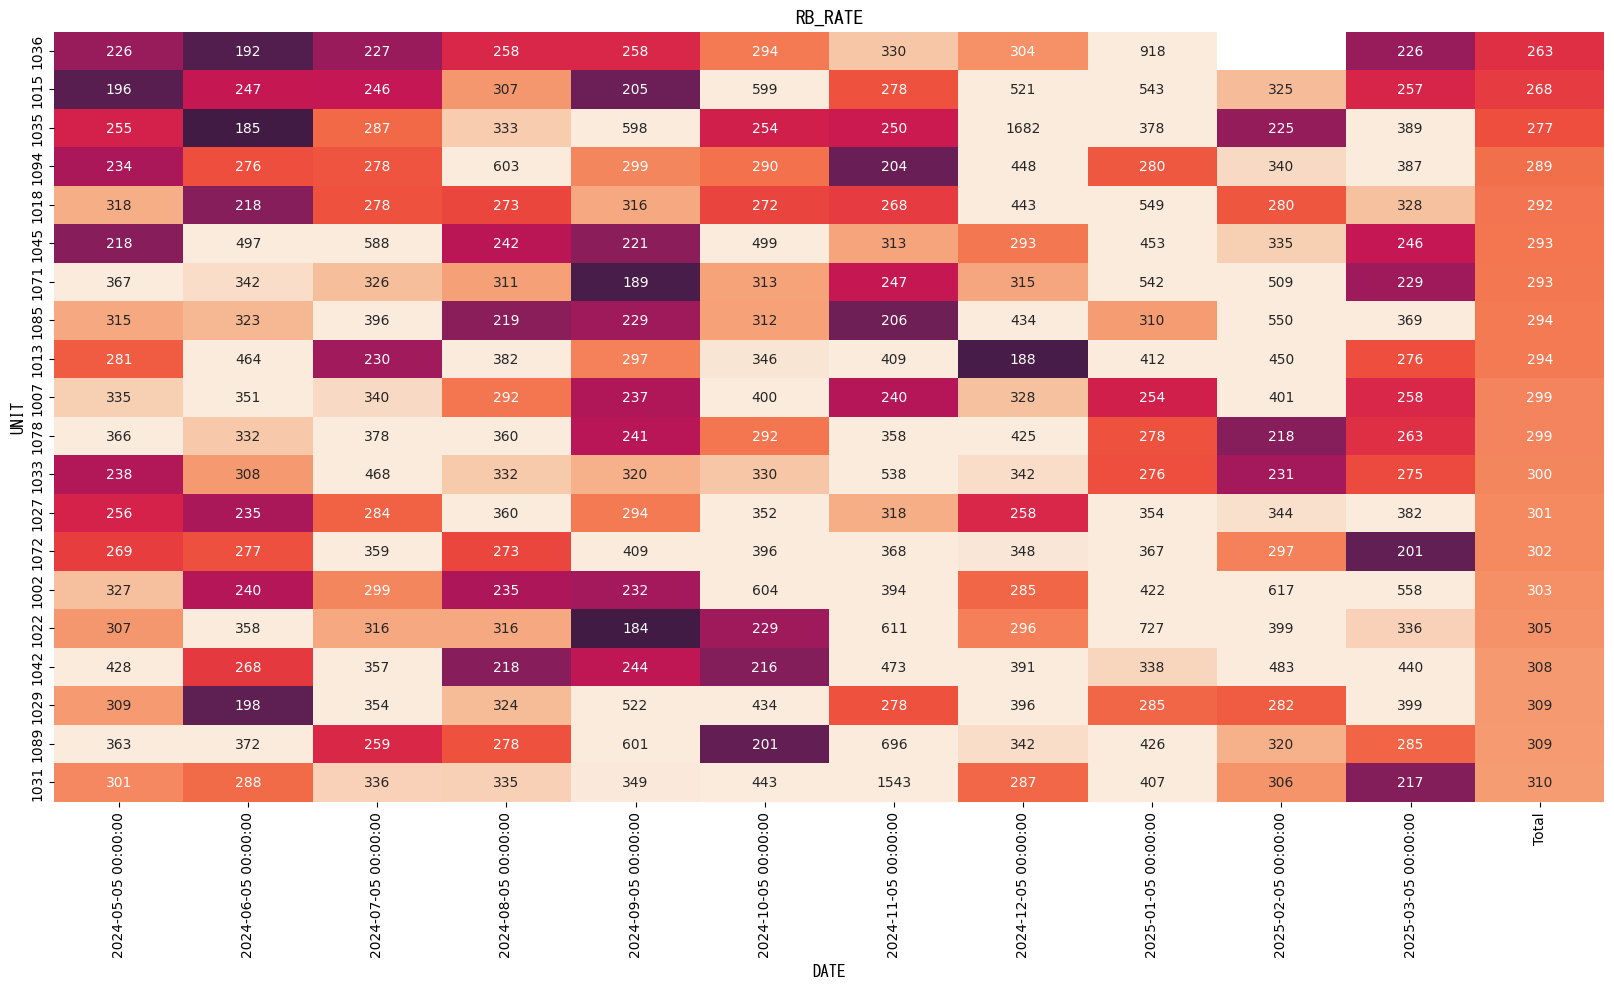

In [92]:
plt.figure(figsize=(20, 10))
sns.heatmap(rb_rate_date.drop("Total").sort_values(rb_rate_date.columns[-1]).head(20), annot=True, fmt=".0f", cbar=False, vmax=350, vmin=150)
plt.title('RB_RATE', fontdict={'fontsize': 14, 'fontname': 'MS Gothic'})
plt.xlabel('DATE',fontdict={'fontsize': 12, 'fontname': 'MS Gothic'})
plt.ylabel('UNIT', fontdict={'fontsize': 12, 'fontname': 'MS Gothic'})
plt.show()

In [93]:
rb_rate_date.iloc[:, -3].sort_values().head(10)

台番号
1003   209
1078   218
1035   225
1014   229
1033   231
1037   240
1087   244
1088   260
1025   261
1005   264
Name: 2025-02-05 00:00:00, dtype: float64